In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#print(os.getcwd())
'home_IMG_41.tiff' in os.listdir()

True

In [3]:
img = plt.imread('home_IMG_41.tiff')
print(img.shape)

(480, 640, 3)


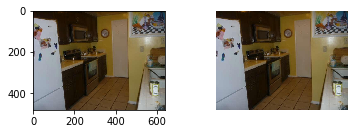

In [4]:
plt.subplot(221)
plt.imshow(img)
plt.subplot(222)
plt.imshow(img)
plt.axis("off"); # semicolon to ignore the output
#plt.show()  # you can comment this if you will use matplotlib inline in the beginning

https://gist.github.com/kidpixo/f4318f8c8143adee5b40

convert a 3D R-G-B image to a 2D image

In [5]:
# Compute the sum of the red, green and blue channels: intensity
intensity = img.sum(axis=2)
print(intensity.shape)

(480, 640)


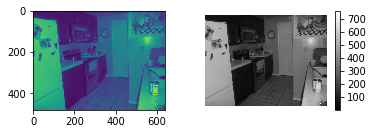

In [6]:
plt.subplot(2,2,1)
plt.imshow(intensity)
plt.subplot(2,2,2)
plt.imshow(intensity, cmap="gray")
plt.colorbar()
plt.axis("off");

In [7]:
pmin, pmax = intensity.min(), intensity.max()
print("The smallest & largest pixel intensities are %d & %d." %(pmin, pmax))

The smallest & largest pixel intensities are 1 & 760.


Rescale the 2D image so that pixel intensities will be from 0 to 255.

In [8]:
rescaled_image = 255*(intensity-pmin)/(pmax-pmin)
print("The rescaled smallest & largest pixel intensities are %.1f & %.1f." %(rescaled_image.min(), rescaled_image.max()))

The rescaled smallest & largest pixel intensities are 0.0 & 255.0.


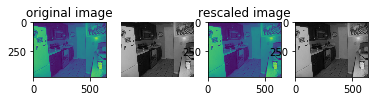

In [9]:
plt.subplot(141)
plt.title("original image")
plt.imshow(intensity)
plt.subplot(142)
plt.imshow(intensity, cmap="gray")
plt.axis("off")
plt.subplot(143)
plt.title("rescaled image")
plt.imshow(rescaled_image)
plt.subplot(144)
plt.imshow(rescaled_image, cmap="gray")

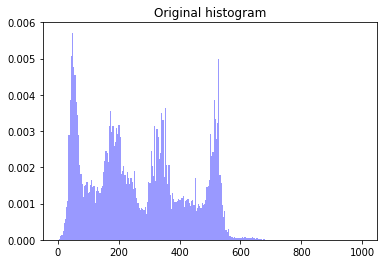

In [10]:
plt.hist(intensity.flatten(), bins=256, range=(0,1000), normed=True, color="blue", alpha=0.4);
plt.title("Original histogram")

0.0 255.0


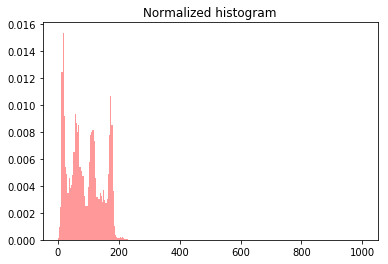

In [11]:
pixels = rescaled_image.flatten()
minval, maxval = rescaled_image.min(), rescaled_image.max()
print(minval, maxval)
plt.title('Normalized histogram')
plt.hist(pixels, bins=256, range=(0,1000), normed=True, color="red", alpha=0.4);

Here, range is x-range of the histogram

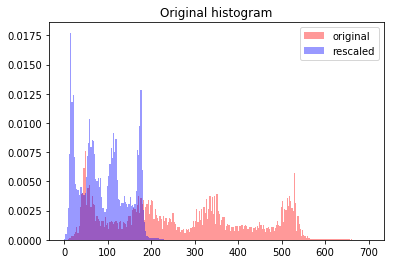

In [12]:
plt.title('Original histogram')
plt.hist(intensity.flatten(), bins=256, range=(0,700), normed=True, color="red", alpha=0.4);
plt.title('Original histogram')
plt.hist(rescaled_image.flatten(), bins=256, range=(0,700), normed=True, color="blue", alpha=0.4);
plt.legend(["original", "rescaled"])

The command plt.twinx() allows two plots to be overlayed sharing the x-axis but with different scales on the y-axis.

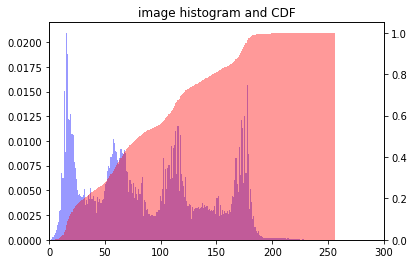

In [13]:
pdf=plt.hist(rescaled_image.flatten(), bins=256, range=(0,256), normed=True, color="blue", alpha=0.4)
plt.twinx()
cdf, bins, patches=plt.hist(rescaled_image.flatten(), cumulative=True, bins=256, range=(0,256), normed=True, color="red", alpha=0.4)
plt.xlim((0,300))
plt.title("image histogram and CDF")

Histogram Equalization : https://en.wikipedia.org/wiki/Histogram_equalization

In [14]:
pixels2 = np.interp(rescaled_image.flatten(), bins[:-1], cdf*255)
image2 = pixels2.reshape(rescaled_image.shape)

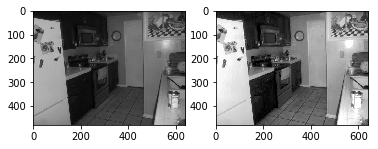

In [15]:
plt.subplot(121)
plt.imshow(rescaled_image, cmap="gray")
plt.subplot(122)
plt.imshow(image2, cmap="gray")

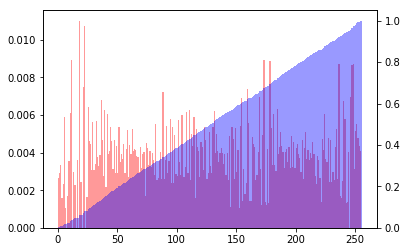

In [16]:
pdf2 = plt.hist(pixels2, bins=256, range=(0,256), normed=True, color="red", alpha=0.4)
# Use plt.twinx() to overlay the CDF
plt.twinx()
cdf2 = plt.hist(pixels2, bins=256, range=(0,256), cumulative=True, normed=True, color="blue", alpha=0.4)
